# 大脑磁共振项目

# 2.数据预处理
## 2.1 数据集的准备与介绍

### 2.1.1把数据集解压到work目录下

In [1]:
# !unzip -oq /home/aistudio/data/data105078/archive.zip -d work/

### 2.1.2 展示

In [2]:
! tree work/ -d

work/
├── kaggle_3m
│   ├── TCGA_CS_4941_19960909
│   ├── TCGA_CS_4942_19970222
│   ├── TCGA_CS_4943_20000902
│   ├── TCGA_CS_4944_20010208
│   ├── TCGA_CS_5393_19990606
│   ├── TCGA_CS_5395_19981004
│   ├── TCGA_CS_5396_20010302
│   ├── TCGA_CS_5397_20010315
│   ├── TCGA_CS_6186_20000601
│   ├── TCGA_CS_6188_20010812
│   ├── TCGA_CS_6290_20000917
│   ├── TCGA_CS_6665_20010817
│   ├── TCGA_CS_6666_20011109
│   ├── TCGA_CS_6667_20011105
│   ├── TCGA_CS_6668_20011025
│   ├── TCGA_CS_6669_20020102
│   ├── TCGA_DU_5849_19950405
│   ├── TCGA_DU_5851_19950428
│   ├── TCGA_DU_5852_19950709
│   ├── TCGA_DU_5853_19950823
│   ├── TCGA_DU_5854_19951104
│   ├── TCGA_DU_5855_19951217
│   ├── TCGA_DU_5871_19941206
│   ├── TCGA_DU_5872_19950223
│   ├── TCGA_DU_5874_19950510
│   ├── TCGA_DU_6399_19830416
│   ├── TCGA_DU_6400_19830518
│   ├── TCGA_DU_6401_19831001
│   ├── TCGA_DU_6404_19850629
│   ├── TCGA_DU_6405_19851005
│   ├── TCGA_DU_6407_19860514
│   ├── TCGA_DU_6408_19860521
│   ├── TCGA_DU_7008

### 2.1.3样本可视化

In [3]:
import cv2
import glob
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Simhei']
%matplotlib inline

# work/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif
# work/lgg-mri-segmentation/kaggle_3m/TCGA_HT_8018_19970411/TCGA_HT_8018_19970411_14_mask.tif

work_path = 'work/kaggle_3m/'
file_path = 'TCGA_CS_4941_19960909/'
image_head = 'TCGA_CS_4941_19960909_'

# work_path = 'work/lgg-mri-segmentation/kaggle_3m/'
# file_path = 'TCGA_HT_8018_19970411/'
# image_head = 'TCGA_HT_8018_19970411_'
lable_name = '_mask' 
image_path_list = []
label_path_list = []

mask_str = work_path + file_path + image_head + '*' + lable_name + '.tif'
# print(mask_str)
lable_path = glob.glob(mask_str)
image_path = [path.replace('_mask', '')
                   for path in lable_path]
# print(image_path)

for i in range(12, 16):
    image_path = work_path + file_path + image_head + str(i) + '.tif'
    lable_path = work_path + file_path + image_head + str(i) + lable_name + '.tif'
    image_path_list.append(image_path)
    label_path_list.append(lable_path)

print(image_path_list, label_path_list)



['work/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_12.tif', 'work/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_13.tif', 'work/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_14.tif', 'work/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_15.tif'] ['work/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_12_mask.tif', 'work/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_13_mask.tif', 'work/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_14_mask.tif', 'work/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_15_mask.tif']


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


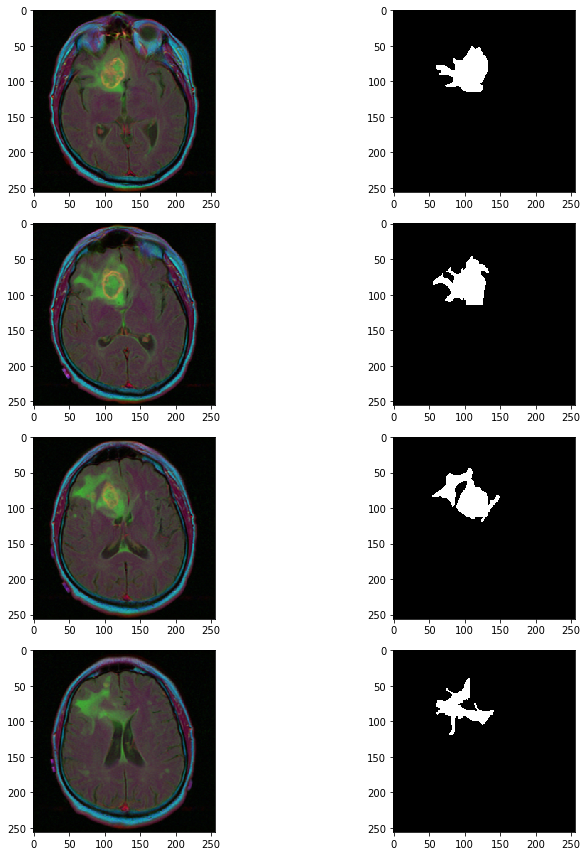

In [4]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for i in range(len(image_path_list)):
    plt.subplot(len(image_path_list), 2, i*2+1)
    # plt.title(image_path_list[i])
    plt.imshow(cv2.imread(image_path_list[i]))

    plt.subplot(len(label_path_list), 2, i*2+2)
    # plt.title(label_path_list[i])
    plt.imshow(cv2.imread(label_path_list[i]))
plt.tight_layout()
plt.show()

### 2.1.4 图像基础操作练习

In [40]:
img = Image.open('work/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_14_mask.tif')
            # if img.mode != 'RGB':
if img.mode not in ('L', 'I;16', 'I'):
    img = img.convert('L')
print(img)

transforms.Resize(size=(256, 256)), #把数据长宽像素调成256*256
transforms.ToTensor(),
transforms.Normalize(mean=[0.5],std=[0.5])

<PIL.TiffImagePlugin.TiffImageFile image mode=L size=256x256 at 0x7FCB044F3F10>


In [73]:
# img_read_test = cv2.imread('work/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif')
img_read_test = cv2.imread('work/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_14_mask.tif')
# print(img_read_test.shape)

# plt.imshow(img_read_test)
# plt.show()



transform = Compose([
    transforms.Resize(size=(256, 256)), #把数据长宽像素调成256*256
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4],std=[0.6]),
    # transforms.Grayscale(),
    # transforms.Normalize()
])

img_read_test = transform(img_read_test)
img_read_test = np.array(img_read_test, dtype='int64')
print(img_read_test.max(), img_read_test.min())

1 0


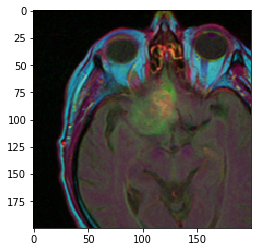

In [6]:
plt.imshow(img_read_test[0:200, 0:200])
plt.show()

(600, 600, 3)


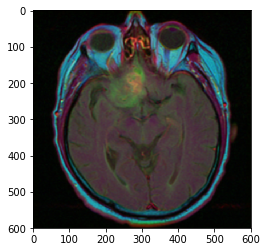

In [7]:
# 图像格式调整
class Resize:
    def __init__(self, size):
        self.size=size
    def __call__(self, img):
        return cv2.resize(img, self.size)

# Resize( (600, 600))通过修改函数中参数进行调节图片的大小
resize=Resize((600, 600))
img_resize=resize(img_read_test)
print(img_resize.shape)
plt.imshow(img_resize)

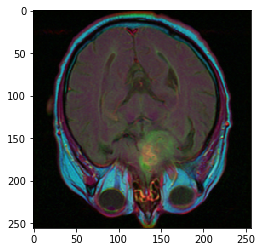

In [8]:
# 图像翻转
class Flip:
    def __init__(self, mode):
        self.mode=mode
    def __call__(self, img):
        return cv2.flip(img, self.mode)

# 指定翻转类型（非随机）
# mode=0垂直翻转、1水平翻转、-1水平加垂直翻转
flip=Flip(mode=-1)
img_flip=flip(img_read_test)
plt.imshow(img_flip)

## 2.2 图像的统计分析

In [9]:
import glob
import numpy as np

def get_mean_std(image_path_list):
    print('Total images:', len(image_path_list))
    max_val, min_val = np.zeros(3), np.ones(3) * 255
    mean, std = np.zeros(3), np.zeros(3)
    for image_path in image_path_list:
        image = cv2.imread(image_path)
        for c in range(3):
            mean[c] += image[:, :, c].mean()
            std[c] += image[:, :, c].std()
            max_val[c] = max(max_val[c], image[:, :, c].max())
            min_val[c] = min(min_val[c], image[:, :, c].min())

    mean /= len(image_path_list)
    std /= len(image_path_list)

    mean /= max_val - min_val
    std /= max_val - min_val

    return mean, std


# mean, std = get_mean_std(glob.glob('work/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_*.tif'))
mean, std = get_mean_std(glob.glob('work/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_*_mask.tif'))
print('mean:', mean)
print('std:', std)

Total images: 23
mean: [0.0095394 0.0095394 0.0095394]
std: [0.05336626 0.05336626 0.05336626]


## 2.3 数据集类定义

In [10]:
# 自定义数据读取器
import paddle
import glob
from paddle.vision import transforms
from paddle.vision.transforms import Compose, ColorJitter, Resize,Transpose, Normalize,BrightnessTransform,RandomVerticalFlip,RandomHorizontalFlip,RandomRotation
import cv2
import numpy as np
from PIL import Image
from paddle.io import Dataset

#自定义的数据预处理函数，输入原始图像，输出处理后的图像，可以借用paddle.vision.transforms的数据处理功能
def preprocess(img, mode='train'):
    # 保留不同的图像方法处理
    if mode == 'train':
        transform = Compose([
            transforms.Resize(size=(224, 224)), #把数据长宽像素调成256*256
            transforms.ColorJitter(0.4, 0.4, 0.4, 0.4),# 随机调整图像的亮度，对比度，饱和度和色调。
            #RandomHorizontalFlip(224),
            #RandomVerticalFlip(224),
            #BrightnessTransform(0.2),
            
            transforms.Normalize(mean=[127.5, 127.5, 127.5], std=[127.5, 127.5, 127.5], data_format='HWC'), #标准化
            # transforms.Transpose(), #原始数据形状维度是HWC格式，经过Transpose，转换为CHW格式
            ])
    elif mode == 'label':
        transform = Compose([
            transforms.Resize(size=(224, 224)), #把数据长宽像素调成256*256
            # transforms.ToTensor(),
            # transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]),
            transforms.Grayscale()
        ])

    img = transform(img)
    return img

class Reader(Dataset):
    def __init__(self, data, is_val=False):
        super().__init__()
        #在初始化阶段，把数据集划分训练集和测试集。由于在读取前样本已经被打乱顺序，取20%的样本作为测试集，80%的样本作为训练集。
        self.samples = data[-int(len(data)*0.2):] if is_val else data[:-int(len(data)*0.2)]

    def _load_img(self, path, mode='image'):
        if mode == 'image':
            # 保留标签和图像不同的处理方式
            img = Image.open(path)
            if img.mode != 'RGB':
                img = img.convert('RGB')
            img = preprocess(img, mode='train') #数据预处理--这里仅包括简单数据预处理，没有用到数据增强   
            # img = img.astype("float32")  
            img = np.array(img, dtype='float32')
        # 保留不同类型的图像处理
        else:
            img = Image.open(path)
            # if img.mode != 'RGB':
            if img.mode not in ('L', 'I;16', 'I'):
                img = img.convert('L')
                # img = img.convert('RGB')
            img = preprocess(img, mode='label') #数据预处理--这里仅包括简单数据预处理，没有用到数据增强
            # img = img.astype("int64")
            img = np.array(img, dtype='int64')

        return img        

    def __getitem__(self,index):
        #处理图像
        img_path = self.samples[index] #得到某样本的路径 
        lable_path = img_path.replace('.tif', '_mask.tif')
        img = self._load_img(img_path)
        label = self._load_img(lable_path, mode='label')
        return img, label

    def __len__(self):
        #返回每个Epoch中图片数量
        return len(self.samples)

image_path = glob.glob('work/kaggle_3m/*/*[0-9].tif')
lable_path = [path.replace('.tif', '_mask.tif')
                for path in image_path]

#生成训练数据集实例
train_dataset = Reader(image_path, is_val=False)

#生成测试数据集实例
eval_dataset = Reader(image_path, is_val=True)


## 2.4 数据集类的测试

In [11]:
# 打印实例
print(len(train_dataset))
for data in train_dataset:
    print(data[0].shape, data[1].shape)
    break

3144
(224, 224, 3) (224, 224)


In [12]:
train_dataloader = paddle.io.DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=False)

eval_dataloader = paddle.io.DataLoader(
    eval_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=False)


num = 0
for step, data in enumerate(train_dataloader):
    if num <1:
        image, label = data
        print(step, image.shape, label.shape)
        num += 1
    else:
        break

0 [32, 224, 224, 3] [32, 224, 224]


# 3.模型搭建

In [106]:
# 自定义数据读取器
import paddle
import glob
from paddle.vision import transforms
from paddle.vision.transforms import Compose, ColorJitter, Resize,Transpose, Normalize,BrightnessTransform,RandomVerticalFlip,RandomHorizontalFlip,RandomRotation
import cv2
import numpy as np
from PIL import Image
from paddle.io import Dataset

#自定义的数据预处理函数，输入原始图像，输出处理后的图像，可以借用paddle.vision.transforms的数据处理功能
def preprocess(img, mode='train'):
    # 保留不同的图像方法处理
    if mode == 'train':
        transform = Compose([
            transforms.Resize(size=(256, 256)), #把数据长宽像素调成256*256
            transforms.Transpose(), #原始数据形状维度是HWC格式，经过Transpose，转换为CHW格式
            # transforms.ColorJitter(0.4, 0.4, 0.4, 0.4),# 随机调整图像的亮度，对比度，饱和度和色调。
            #RandomHorizontalFlip(224),
            #RandomVerticalFlip(224),
            #BrightnessTransform(0.2),
            transforms.Normalize(mean=127.5, std=127.5), #标准化
            ])
    elif mode == 'label':
        transform = Compose([
            transforms.Resize(size=(256, 256)), #把数据长宽像素调成256*256
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.4],std=[0.6]),
            # transforms.Grayscale(),
            # transforms.Normalize()
        ])

    img = transform(img)
    return img

class Reader(Dataset):
    def __init__(self, data, is_val=False):
        super().__init__()
        #在初始化阶段，把数据集划分训练集和测试集。由于在读取前样本已经被打乱顺序，取20%的样本作为测试集，80%的样本作为训练集。
        self.samples = data[-int(len(data)*0.2):] if is_val else data[:-int(len(data)*0.2)]

    def _load_img(self, path, mode='image'):
        if mode == 'image':
            # 保留标签和图像不同的处理方式
            img = Image.open(path)
            if img.mode != 'RGB':
                img = img.convert('RGB')
            img = preprocess(img, mode='train') #数据预处理--这里仅包括简单数据预处理，没有用到数据增强   
            # img = img.astype("float32")  
            img = np.array(img, dtype='float32')
        # 保留不同类型的图像处理
        else:
            img = Image.open(path)
            # if img.mode != 'RGB':
            if img.mode not in ('L', 'I;16', 'I'):
                img = img.convert('L')
                # img = img.convert('RGB')
            img = preprocess(img, mode='label') #数据预处理--这里仅包括简单数据预处理，没有用到数据增强
            # img = img.astype("int64")
            img = np.array(img, dtype='int64')

        return img        

    def __getitem__(self,index):
        #处理图像
        img_path = self.samples[index] #得到某样本的路径 
        lable_path = img_path.replace('.tif', '_mask.tif')
        img = self._load_img(img_path)
        label = self._load_img(lable_path, mode='label')
        return img, label

    def __len__(self):
        #返回每个Epoch中图片数量
        return len(self.samples)

image_path = glob.glob('work/kaggle_3m/*/*[0-9].tif')
lable_path = [path.replace('.tif', '_mask.tif')
                for path in image_path]




In [107]:
from paddle.nn import functional as F
import paddle.nn as nn
import paddle
import numpy as np

class SeparableConv2D(paddle.nn.Layer):
    def __init__(self, 
                 in_channels, 
                 out_channels, 
                 kernel_size, 
                 stride=1, 
                 padding=0, 
                 dilation=1, 
                 groups=None, 
                 weight_attr=None, 
                 bias_attr=None, 
                 data_format="NCHW"):
        super(SeparableConv2D, self).__init__()

        self._padding = padding
        self._stride = stride
        self._dilation = dilation
        self._in_channels = in_channels
        self._data_format = data_format

        # 第一次卷积参数，没有偏置参数
        filter_shape = [in_channels, 1] + self.convert_to_list(kernel_size, 2, 'kernel_size')
        self.weight_conv = self.create_parameter(shape=filter_shape, attr=weight_attr)

        # 第二次卷积参数
        filter_shape = [out_channels, in_channels] + self.convert_to_list(1, 2, 'kernel_size')
        self.weight_pointwise = self.create_parameter(shape=filter_shape, attr=weight_attr)
        self.bias_pointwise = self.create_parameter(shape=[out_channels], 
                                                    attr=bias_attr, 
                                                    is_bias=True)
    
    def convert_to_list(self, value, n, name, dtype=np.int):
        if isinstance(value, dtype):
            return [value, ] * n
        else:
            try:
                value_list = list(value)
            except TypeError:
                raise ValueError("The " + name +
                                "'s type must be list or tuple. Received: " + str(
                                    value))
            if len(value_list) != n:
                raise ValueError("The " + name + "'s length must be " + str(n) +
                                ". Received: " + str(value))
            for single_value in value_list:
                try:
                    dtype(single_value)
                except (ValueError, TypeError):
                    raise ValueError(
                        "The " + name + "'s type must be a list or tuple of " + str(
                            n) + " " + str(dtype) + " . Received: " + str(
                                value) + " "
                        "including element " + str(single_value) + " of type" + " "
                        + str(type(single_value)))
            return value_list
    
    def forward(self, inputs):
        conv_out = F.conv2d(inputs, 
                            self.weight_conv, 
                            padding=self._padding,
                            stride=self._stride,
                            dilation=self._dilation,
                            groups=self._in_channels,
                            data_format=self._data_format)
        
        out = F.conv2d(conv_out,
                       self.weight_pointwise,
                       bias=self.bias_pointwise,
                       padding=0,
                       stride=1,
                       dilation=1,
                       groups=1,
                       data_format=self._data_format)

        return out

class Encoder(paddle.nn.Layer):
    def __init__(self, in_channels, out_channels):
        super(Encoder, self).__init__()
        
        self.relus = paddle.nn.ReLU()
        self.separable_conv_01 = SeparableConv2D(in_channels, 
                                                 out_channels, 
                                                 kernel_size=3, 
                                                 padding='same')
        self.bns = paddle.nn.BatchNorm2D(out_channels)
        self.pool = paddle.nn.MaxPool2D(kernel_size=3, stride=2, padding=1)
        self.residual_conv = paddle.nn.Conv2D(in_channels, 
                                              out_channels, 
                                              kernel_size=1, 
                                              stride=2, 
                                              padding='same')

    def forward(self, inputs):
        previous_block_activation = inputs
        
        y = self.relus(inputs)
        y = self.separable_conv_01(y)
        y = self.bns(y)
        y = self.pool(y)        
        residual = self.residual_conv(previous_block_activation)
        y = paddle.add(y, residual)

        return y

class Decoder(paddle.nn.Layer):
    def __init__(self, in_channels, out_channels):
        super(Decoder, self).__init__()

        self.relus = paddle.nn.ReLU()
        self.conv_transpose_01 = paddle.nn.Conv2DTranspose(in_channels, 
                                                           out_channels, 
                                                           kernel_size=3, 
                                                           padding='same')
        self.bns = paddle.nn.BatchNorm2D(out_channels)
        self.upsamples = paddle.nn.LayerList(
            [paddle.nn.Upsample(scale_factor=2.0) for i in range(2)]
        )
        self.residual_conv = paddle.nn.Conv2D(in_channels, 
                                              out_channels, 
                                              kernel_size=1, 
                                              padding='same')

    def forward(self, inputs):
        previous_block_activation = inputs

        y = self.relus(inputs)
        y = self.conv_transpose_01(y)
        y = self.bns(y)
        y = self.upsamples[0](y)
        
        residual = self.upsamples[1](previous_block_activation)
        residual = self.residual_conv(residual)
        
        y = paddle.add(y, residual)
        
        return y

class Net(paddle.nn.Layer):
    def __init__(self, num_classes):
        super(Net, self).__init__()

        self.conv_1 = paddle.nn.Conv2D(3, 32, kernel_size=3, stride=2, padding='same')
        self.bn = paddle.nn.BatchNorm2D(32)
        self.relu = paddle.nn.ReLU()

        in_channels = 32
        self.encoders = []

        self.encoder_list = [64, 128]
        self.decoder_list = [128, 64, 32]
        # self.encoder_list = [64, 128]
        # self.decoder_list = [128, 64, 32]

        # 根据下采样个数和配置循环定义子Layer，避免重复写一样的程序
        for out_channels in self.encoder_list:
            block = self.add_sublayer('encoder_{}'.format(out_channels),Encoder(in_channels, out_channels))
            self.encoders.append(block)
            in_channels = out_channels

        self.decoders = []

        # 根据上采样个数和配置循环定义子Layer，避免重复写一样的程序
        for out_channels in self.decoder_list:
            block = self.add_sublayer('decoder_{}'.format(out_channels), Decoder(in_channels, out_channels))
            self.decoders.append(block)
            in_channels = out_channels

        self.output_conv = paddle.nn.Conv2D(in_channels, num_classes, kernel_size=3, padding='same')
    
    def forward(self, inputs):
        y = self.conv_1(inputs)
        y = self.bn(y)
        y = self.relu(y)
        
        for encoder in self.encoders:
            y = encoder(y)

        for decoder in self.decoders:
            y = decoder(y)
        
        y = self.output_conv(y)
        # y = nn.MaxPool2D(2, 2)
        
        return y    

In [108]:
import paddle
# from unet import DoveNet

class SaveBestModel(paddle.callbacks.Callback):
    def __init__(self, target=0.5, path='./best_model', verbose=0):
        self.target = target
        self.epoch = None
        self.path = path

    def on_epoch_end(self, epoch, logs=None):
        self.epoch = epoch

    def on_eval_end(self, logs=None):
        if logs.get('loss')[0] < self.target:
            self.target = logs.get('loss')[0]
            self.model.save(self.path)
            print('best model is loss {} at epoch {}'.format(self.target, self.epoch))

callback_visualdl = paddle.callbacks.VisualDL(log_dir='unet')
callback_savebestmodel = SaveBestModel(target=1, path='unet')
callbacks = [callback_visualdl, callback_savebestmodel]

train_dataset = Reader(image_path, is_val=False)

#生成测试数据集实例
val_dataset = Reader(image_path, is_val=True)


train_loader = paddle.io.DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=False)

eval_loader = paddle.io.DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=False)


num_classes = 2
IMAGE_SIZE = (256, 256)
network = Net(num_classes)
model = paddle.Model(network)

# 动量优化法
optim = paddle.optimizer.Momentum(learning_rate=0.001, 
                                 momentum=0.9, 
                                 parameters=model.parameters())
# model.prepare(optim, paddle.nn.CrossEntropyLoss(axis=1))
model.prepare(optim, paddle.nn.CrossEntropyLoss(axis=1))


In [109]:
model.summary((-1, 3,) + IMAGE_SIZE)

------------------------------------------------------------------------------
   Layer (type)        Input Shape          Output Shape         Param #    
    Conv2D-46       [[1, 3, 256, 256]]   [1, 32, 128, 128]         896      
  BatchNorm2D-37   [[1, 32, 128, 128]]   [1, 32, 128, 128]         128      
     ReLU-37       [[1, 32, 128, 128]]   [1, 32, 128, 128]          0       
     ReLU-38       [[1, 32, 128, 128]]   [1, 32, 128, 128]          0       
SeparableConv2D-10 [[1, 32, 128, 128]]   [1, 64, 128, 128]        2,400     
  BatchNorm2D-38   [[1, 64, 128, 128]]   [1, 64, 128, 128]         256      
   MaxPool2D-10    [[1, 64, 128, 128]]    [1, 64, 64, 64]           0       
    Conv2D-47      [[1, 32, 128, 128]]    [1, 64, 64, 64]         2,112     
    Encoder-10     [[1, 32, 128, 128]]    [1, 64, 64, 64]           0       
     ReLU-39        [[1, 64, 64, 64]]     [1, 64, 64, 64]           0       
SeparableConv2D-11  [[1, 64, 64, 64]]     [1, 128, 64, 64]        8,896   

{'total_params': 291682, 'trainable_params': 289890}

In [110]:
model.fit(train_loader, 
          eval_loader, 
          epochs=20, 
          callbacks=callbacks,
          verbose=1)

# model.fit(train_loader)

# model.evaluate(eval_loader, 
#           verbose=1)

# model.predict(eval_loader)

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/20


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/nn/layer/norm.py:653: UserWarning: When training, we now always track global mean and variance.
  "When training, we now always track global mean and variance.")


step 99/99 [==============================] - loss: 0.1890 - 235ms/step         
Eval begin...
step 25/25 [==============================] - loss: 0.1203 - 194ms/step        
Eval samples: 785
best model is loss 0.12028396874666214 at epoch 0
Epoch 2/20
step 99/99 [==============================] - loss: 0.1282 - 234ms/step         
Eval begin...
step 25/25 [==============================] - loss: 0.0568 - 185ms/step        
Eval samples: 785
best model is loss 0.05676622316241264 at epoch 1
Epoch 3/20
step 99/99 [==============================] - loss: 0.0707 - 232ms/step         
Eval begin...
step 25/25 [==============================] - loss: 0.0329 - 187ms/step        
Eval samples: 785
best model is loss 0.032887592911720276 at epoch 2
Epoch 4/20
step 99/99 [==============================] - loss: 0.0030 - 232ms/step         
Eval begin...
step 25/25 [==============================] - loss: 0.0350 - 220ms/step        
Eval samples: 785
Epoch 5/20
step 99/99 [=====================

## 预测数据集准备

In [111]:
num_classes = 2
IMAGE_SIZE = (256, 256)
network_new = Net(num_classes)
state_dict = paddle.load('unet.pdparams')
network_new.set_state_dict(state_dict)
model_new = paddle.Model(network_new)

In [112]:
predict_dataset = Reader(image_path, is_val=True)
test_loader = paddle.io.DataLoader(
    predict_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=False)

# test_loader = paddle.io.DataLoader(predict_dataset, places=paddle.CUDAPlace(0), batch_size= 32)
model_new.prepare(paddle.nn.CrossEntropyLoss(axis=1))
predict_results = model_new.predict(test_loader)

Predict begin...
step 25/25 [==============================] - 189ms/step        
Predict samples: 785


In [113]:
import numpy as np
import matplotlib.pyplot as plt
from paddle.vision.transforms import transforms as T
from PIL import Image as PilImage

In [114]:
# predict_dataset[1][0], predict_dataset[1][1]
image_path = glob.glob('work/kaggle_3m/*/*[0-9].tif')
predict_set = image_path[:-int(len(image_path)*0.2)]
# print(predict_samples)
predict_label = [path.replace('.tif', '_mask.tif')
                for path in predict_set]

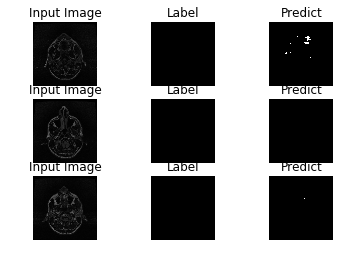

In [121]:
idx = 0

for id in range(3):
    i = id+20
    image_path = predict_set[i]
    image_label = predict_label[i]

    resize_t = T.Compose([
        T.Resize(IMAGE_SIZE)
    ])
    image = resize_t(PilImage.open(image_path))
    label = resize_t(PilImage.open(image_label))

    image = np.array(image).astype('uint8')
    label = np.array(label).astype('uint8')

    plt.subplot(3, 3, idx + 1)
    plt.imshow(image)
    plt.title('Input Image')
    plt.axis("off")

    plt.subplot(3, 3, idx + 2)
    plt.imshow(label, cmap='gray')
    plt.title('Label')
    plt.axis("off")

    data = predict_results[0][0][i].transpose((1, 2, 0))
    mask = np.argmax(data, axis=-1)

    plt.subplot(3, 3, idx + 3)
    plt.imshow(mask.astype('uint8'), cmap='gray')
    plt.title('Predict')
    plt.axis("off")
    idx += 3
plt.show()
